# Image 1 : 

Filename: C:\Users\AYUSH MISHRA\.astropy\cache\download\url\4d1dd28a5622033065b02db11df7725c\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (300, 300)   float32   
Image Data :  [[7233. 4904. 3869. ... 6323. 5806. 4771.]
 [4387. 4128. 4128. ... 5288. 4253. 4253.]
 [3869. 3611. 3611. ... 5288. 5288. 4253.]
 ...
 [7226. 6579. 5027. ... 4208. 4208. 4208.]
 [4639. 4509. 5027. ... 4208. 4208. 4208.]
 [3992. 3474. 3992. ... 4725. 4208. 3949.]]
(300, 300)
(90000,)


[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

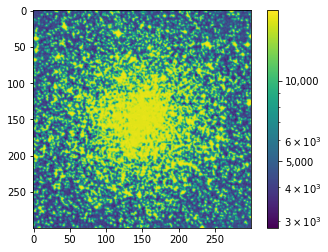

In [1]:
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

image_file = download_file('file:///D:/FITS/image1.fits', cache=True )
hdu_list = fits.open(image_file)
hdu_list.info()

header = hdu_list[0].header
# print("Header : " , header)

image_data = hdu_list[0].data
print("Image Data : ", image_data)

print(image_data.shape)

plt.imshow(image_data)
print(image_data.flatten().shape)
plt.imshow(image_data, norm=LogNorm())

cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
# print(np.max(image_data[150:,:]))
# print(np.min(image_data[:,0:250]))


In [2]:
print("All the header data in a readable format : \n \n")

for keyword, value in header.items():
    print(f"{keyword}: {value}")
# print(header)

All the header data in a readable format : 
 

SIMPLE: True
BITPIX: -32
NAXIS: 2
NAXIS1: 300
NAXIS2: 300
CRVAL1: 245.89675000000003
CRVAL2: -26.52575
RADESYS: FK5
EQUINOX: 2000.0
CTYPE1: RA---TAN
CTYPE2: DEC--TAN
CRPIX1: 150.5
CRPIX2: 150.5
CDELT1: -0.00047222219999999997
CDELT2: 0.00047222219999999997
COMMENT: 
COMMENT: SkyView Survey metadata
COMMENT: 
COMMENT: Provenance:  Data taken by ROE and AAO, CalTech, Compression
COMMENT:                    and distribution by Space Telescope Science Instit
COMMENT:          ute.
COMMENT: Copyright:   STScI, ROE, AAO, UK-PPARC, CalTech, National Geographic S
COMMENT:          ociety.            Full copyright notice
COMMENT: Regime:      Optical
COMMENT: NSurvey:     1
COMMENT: Frequency:   560 THz (Different plates have different bands: J or E wi
COMMENT:          th a few exceptions)
COMMENT: Bandpass:    422-965 THz (individual plates have smaller bandpass)
COMMENT: Coverage:    All-sky
COMMENT: PixelScale:  1.7"
COMMENT: Units:       Scal

In [3]:
x_pix = 150
y_pix = 150

ra = (x_pix - header['CRPIX1']) * header['CDELT1'] + header['CRVAL1']
dec = (y_pix - header['CRPIX2']) * header['CDELT2'] + header['CRVAL2']

print("Right Ascension ", ra)
print("Declination : ", dec)

from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad

coord = SkyCoord(ra, dec, unit='deg')
#SIMBAD Database
result = Simbad.query_region(coord, radius='0d0m5s')
# print("Result : ", result)

origin = header['ORIGIN']
print("Image taken by : ", header['ORIGIN'])

object_name = result['MAIN_ID'][0]
print("The object present in the image is : ", object_name)



Right Ascension  245.89698611110003
Declination :  -26.5259861111
Image taken by :  CASB -- STScI
The object present in the image is :  M   4


## M 4 is a large globular cluster in the constellation Scorpius .

# Other Details : 

## Telescope Used : Palomar 48-inch Schmidt Telescope (For northern Plates)
## Telescope Used : UK Schmidt Telescope (For southern Plates)
## Frequency:   560 THz
## Bandpass:    422-965 THz